# Activation Functions and Loss Functions

So far we have covered some of the basic maths assoiated with neural networks, we've implemented a simple neural network, we've used backpropagation and gradient descent to optimize the the network, and we've talked about function optimization in general using derivatives and the gradient.

We've also learned that neural networks can be universal function approximators. If we have a dataset that represents the output of a function, or represents a distribution of data, we can approximate the function or the process that generates the data distribution. This is powerful, since we don't always have a straight forward way, or the time, to precisely code a function that performs the task of such a function or data generation process. (Take this with a grain of salt since there is more to this that what I'm writing here).

#### The non-linear activation function
We learned that when we implemented a neural network without a non-linear activation function, we were able to approximate any linear function. When we apply a non-linear activation function, the neural network gains the property of being able to model any function at all.

Not all activation functions are created equal though, and using one activation function over another has certain consequences on the behavior of the network as it converges on a solution.

#### The loss function
The loss function is a vitally important aspect of any supervised machine learning algorithm that is optimized. With a neural network, the loss function becomes even more imporatant. In order to approximate a function using a neural network, the problem must be posed via selection of an appropriate loss function. In addition to the loss function, the form of the final layer also plays an important role. In fact, the final layer, the activation function chosen to produce the final output, as well as the loss function are in essence what defines the function to be approximated.

The remaining elements of the network exist essentially to peform feature extraction and to form representations of the data that may be used to produce meaningful outputs that can be used to approximate the function which in turn is used to solve some problem.

In this notebook, we'll explore some of the properties of a few select activation functions and loss functions, and we'll discuss the relationships between some of them. More importantly, we'll attempt to understand why these relationships exist and how we might exploit them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def formatter(ax=None, title=''):
    "Helper to set a grid and 0 axis lines"
    if not ax:
        plt.grid(True, alpha=0.4); plt.axvline(0, alpha=0.6); plt.axhline(0, alpha=0.6); plt.title(title)
        return plt
    else:
        ax.grid(True, alpha=0.4); ax.axvline(0, alpha=0.6); ax.axhline(0, alpha=0.6); ax.set_title(title)
        return ax

### The sigmoid family of activation functions

In the early days of neural networks, the computational model of a neuron consisted of a linear combination of inputs followed by the application of a very simple activation function that output a 1 or a zero. This function is known as the Perceptron.

$$ f(x)= 
\begin{cases}
    1,& \text{if } x > 0\\
    0,              & \text{otherwise}
\end{cases}$$

In [3]:
def single_unit_perceptron(x, weight=1, bias=0., show=False):
    """
    We've placed the linear combination INSIDE this function
    but normally it would be found outside
    """
    linear_combination = x * weight + bias

    if show:
        print(linear_combination)

    if linear_combination > 0.0:
        return 1
    else:
        return 0

In [4]:
single_unit_perceptron(0.4, show=True), \
single_unit_perceptron(-0.8, show=True)

0.4
-0.8


(1, 0)

We could (and people have) built entire systems of Perceptrons. The problem with this function when it comes to learning is that it is not differentiable. For learning algorithms such as gradient descent, this is a very important, I dare say requisite, for any activation function. We learned in the previous notebook that gradient descent depends on being able to find the derivative of the loss function and any activation function that is present throughout a network since being able to compute the Jacobian, or matrix of partial first derivatives, is what allows us to backpropagate the gradient of the error which is used to perform gradient descent.

The outputs of the single unit Perceptron is shown below.

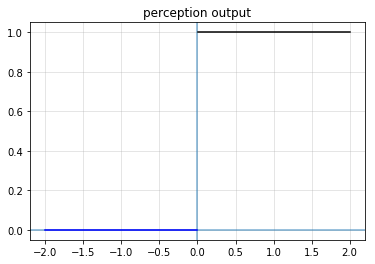

In [5]:
x = np.linspace(-2, 2, 1000);
y = [single_unit_perceptron(i) for i in x];

fig, ax = plt.subplots()
ax = formatter(ax, title='perception output')

i = int(len(x)/2)
ax.plot(x[i:], y[i:], color='black');
ax.plot(x[:i], y[:i], color='blue');

Technically we can differentiate this function. BUT, it won't give us information with respect to the weights of the function given any error we are able to measure. Why? Because there is no slope to the function. All the outputs for inputs that are negative produce a straight horizontal line at $y=1$. The same is true for all inputs above zero. And lines have no slope. Essentially, the output can be written as $Y = 0x + b$ where $b=0$ or $b=1$. The derivative of this function is equal to the coefficient of the variable x, which is zero.

To overcome the limitation of the uniformative perceptron, researchers began experimenting with continuous functions that have slope. In particular, the sigmoid begam popular in the early days since it proved useful when training small neural networks. We've seen this before, but lets have another look:

$$f(x) \frac{1}{1 + e^{-x}}$$

In [6]:
def logistic_function(x):
    return 1. / (1 + np.exp(-x))

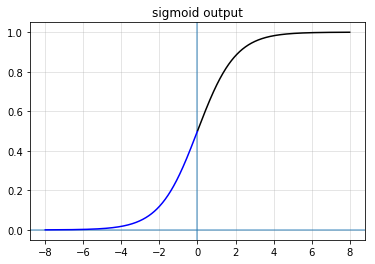

In [7]:
x = np.linspace(-8, 8, 1000);
y = [logistic_function(i) for i in x];

fig, ax = plt.subplots()
ax = formatter(ax, title='sigmoid output')

i = int(len(x)/2)  # cut x and y in half
ax.plot(x[i:], y[i:], color='black');
ax.plot(x[:i], y[:i], color='blue');

The `logistic_function` is a real valued function that is a member of a family of functions called sigmoids that all exhibit this characteristic curve. The logistic function is typically referred to as a sigmoid, but there are many sigmoid functions.

Another function you will likely come across is the hyperbolic tangent function:

$$f(x) = tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

In [8]:
np.e

2.718281828459045

In [9]:
def tanh(x):
    return ((np.e ** x) - (np.e ** -x)) / ((np.e ** x) + (np.e ** -x))

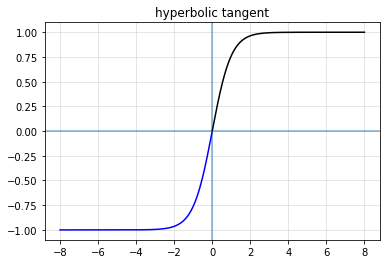

In [10]:
x = np.linspace(-8, 8, 1000);
y = [tanh(i) for i in x];

fig, ax = plt.subplots()
ax = formatter(ax, title='hyperbolic tangent')

i = int(len(x)/2)  # cut x and y in half
ax.plot(x[i:], y[i:], color='black');
ax.plot(x[:i], y[:i], color='blue');

Both of these functions exhibit sigmoid behavior: They are both continuous, increasing to the right (monotonic), horizontally asymptotic, and most importantly - differentiable.

### Implications of choosing a sigmoid activation function

These sorts of units have statistical implications associated with their use and the way we pose learning tasks is directly related to the activation functions we choose. For example, the logistic function can be interpreted as outputting a probability score since it outputs a value squashed between 0 and 1. For this reason, it is commonly used as an output unit with networks trained on binary classification tasks. On the input side, the values that the logistic function receives can be considered unnormalized log probabilities, or logits.

Another consideration is the potential for saturation of the activation function during training and what that means for the backpropagation of error and the computation of gradient. Both of these functions (logistic, tanh) both saturate relatively quickly when their inputs are greater or less than 2. During backpropagation, we compute the vector of partial derivatives of each layer with respect to the weights. In other words, we compute the derivative of the activation function and we compute the slope of the activation function using the derivative at the point output by the function.

If we compute the derivative of the logistic or the tanh function between -2 and 2, there is a reasonable amount of information about the direction we must move in order to minimize the total loss. However if the activation unit saturates, the slope of the function moves towards zero and we get little information for the update.

In [11]:
def logistic_deriv(x):
    return logistic_function(x) * (1. - logistic_function(x))

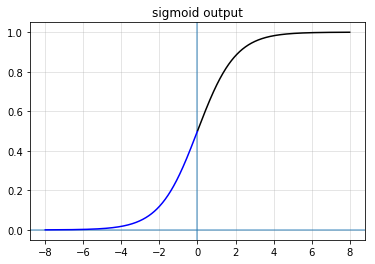

In [12]:
x = np.linspace(-8, 8, 1000);
y = [logistic_function(i) for i in x];

fig, ax = plt.subplots()
ax = formatter(ax, title='sigmoid output')

i = int(len(x)/2)  # cut x and y in half
ax.plot(x[i:], y[i:], color='black');
ax.plot(x[:i], y[:i], color='blue');

In [13]:
def linear(x, m):
    return x * m

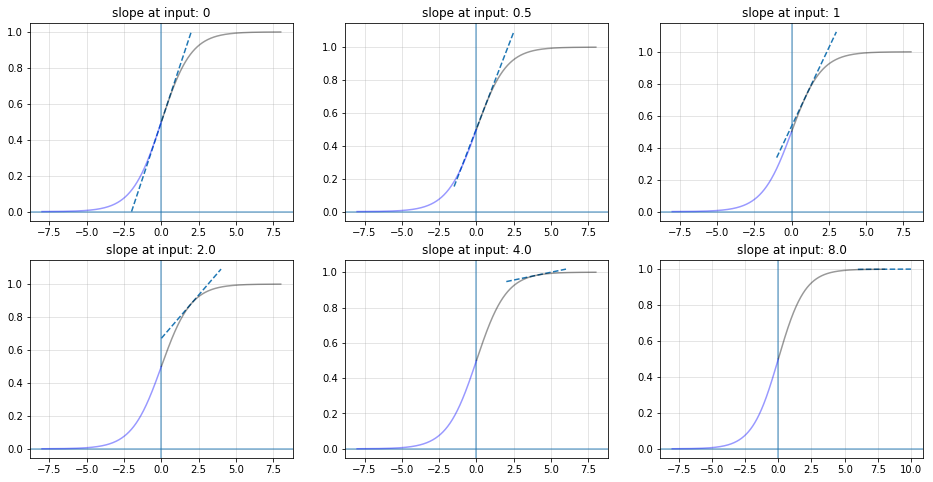

In [14]:
points = [0, 0.5, 1, 2.0, 4.0, 8.]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
for point, ax in zip(points, axes.flatten()):
    
    ax = formatter(ax, title=f'slope at input: {point}')
    x = np.linspace(-2, 2, 2)

    # derivative plot
    m = logistic_deriv(point)
    y = linear(x, m=m)
    
    y_shift = logistic_function(point)
    ax.plot(x+point, y+y_shift, linestyle='--')

    # sigmoid plot
    x = np.linspace(-8, 8, 1000);
    y = [logistic_function(i) for i in x];
    i = int(len(x)/2)  # cut x and y in half
    ax.plot(x[i:], y[i:], color='black', alpha=0.4);
    ax.plot(x[:i], y[:i], color='blue', alpha=0.4);

### The rectified linear unit

The sigmoid is useful in certain training situations, however it typically performs poorly when used to train wide and deep networks. More recent research has pointed to the rectified linear unit, or ReLu, as a suitable alternative.

In [15]:
def relu(x):
    if x > 0:
        return x
    else:
        return 0

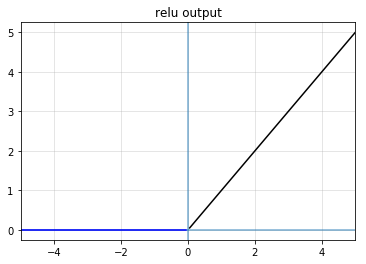

In [16]:
x = np.linspace(-5, 5, 100);
y = [relu(i) for i in x];

fig, ax = plt.subplots()
ax = formatter(ax, title='relu output')

i = int(len(x)/2)  # cut x and y in half
ax.plot(x[i:], y[i:], color='black');
ax.plot(x[:i], y[:i], color='blue');
ax.set_xlim((-5, 5));

This activation function has many useful properties. The two most important in practice is that it is trivial to differentiate, and maintains much of the desirable properties of a linear function. Linear functions form the basis of much of the work of a neural network, and it turns out that the closer we are able to remain to an overall linear structure, the easier it tends to be to train.

Rectified linear units are technically not linear, since they introduce a non-linearity at the origin (hence the word rectified). Furthermore, the derivative is simply 1 for all inputs greater than 0, and 0 otherwise which helps stabilize training where linear-esque non-linear transformations are required to produce appropriate hidden representations of input variables while retaining the ability to model non-linear variable interactions.

### Interplay between output units and loss functions: the key to function approximation

The first simple neural network we implemented in the second notebook approximated a function that performed linear regression. How can we tell? 

In [17]:
# This code will not run - its just a reminder
try:
    # Forward Pass
    hidden_layer_out = np.dot(batch_input, hidden_weights) # No activation function
    pred = np.dot(hidden_layer_out, output_weights) # No activation function

    # loss
    epoch_loss += loss_function(pred, batch_target)
except:
    pass

First, we can tell that the network was truly a linear function approximator because no hidden unit in any layer employed a non-linear activation function. This network was only capable of approximating linear combinations of the input variables and thus can only approximate a linear function (in math speak, polynomials of arbitrary numbers of terms depending on the number of inputs but all specifically of degree 1).

Second, we know that the output is a linearly scaled value conditioned on the network's input since the final layer has a single output that is not transformed via some non-linear function.

Third, the final layer has but a single output, which represents a final linear combination which will produce a single value - which is the goal of a linear regression model - compute (y) given (x) and some coefficient set. 

If it looks like a duck, walks like a duck, and quacks like a duck... it must be a linear function approximator. But how do we enforce a linear regression approximation? Through the loss function.

The loss function. The loss function we used in this neural network implementation was the sum of squared errors. We compute the error for each example in the batch, square each difference, and then sum them all together.

### Sum of Squared error

$$ L(x) = \frac{1}{2}(f(x) - y)^2 $$

In [18]:
example_output = np.random.randint(10, 50, 10)
labels = np.random.randint(10, 50, 10)

In [19]:
example_output

array([49, 29, 23, 35, 35, 41, 41, 13, 39, 43])

In [20]:
labels

array([16, 48, 30, 18, 36, 48, 27, 48, 40, 26])

In [21]:
errors = labels - example_output
errors

array([-33,  19,   7, -17,   1,   7, -14,  35,   1, -17])

In [22]:
errors ** 2

array([1089,  361,   49,  289,    1,   49,  196, 1225,    1,  289])

In [23]:
np.sum(errors ** 2)

3549

The absolute minimum loss we can achieve for a linear regression model depends on the variance of the data.

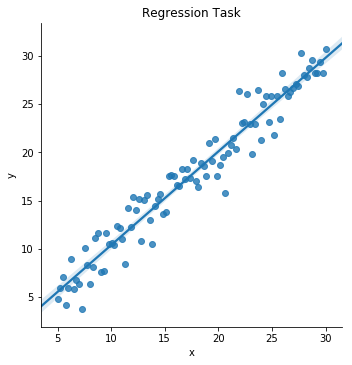

In [24]:
x = np.linspace(5, 30, 100)
y = x + np.random.normal(0, 2, len(x))

d = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))
sns.lmplot(x='x', y='y', data=pd.DataFrame(d, columns=['x', 'y']), fit_reg=True)
plt.title("Regression Task");

As the model fits the data, we use the loss function to compute distance from each predicted point to the actual point, and we adjust the coefficients to change the slope of the line through the data.

### Negative log likelihood

Measuring this error using the sum of squares makes sense when measuring the distance from a regression line to a datapoint. But can we switch this loss function out with any other function and still produce a linear regression function approximation?

No. 

Lets take the Maximum likelihood (negative log likelihood) loss and see what happens when we apply it to the linear regression task.

$$ L(x) = -log(x) $$

First of all, it should be immediately clear when we compute the negative log of a value, we are not measuring the distance between anything. If we cannot measure the distance between a predicted value and the value we were supposed to have computed, we can't determine how far off we were in our regression task. 

This shows immediately that this function will not serve to compute a suitable loss.

An instructive exercise to explore the characteristics of the negative log likelihood loss a bit further we can find other reasons it wouldn't work for linear regression tasks. (Say for example that we take the neg log of the difference between prediction and label).

Let's make up some examples and see what happens.

In [25]:
# a tiny fraction of the total number of positions where could assign value for maximum likelihood
x = np.linspace(-1, 1, 10000)
x

array([-1.        , -0.99979998, -0.99959996, ...,  0.99959996,
        0.99979998,  1.        ])

This function is continuous and defined for inputs greater than 0. This is a problem for regression, since it is completely possible that we are trying to predict a negative number.

So let's say we take the absolute value, so we can keep going.

If we discretize the space, we can easily assemble 10,000 positions where we might find a correct answer for our regression problem so we can see what the slope of this function looks like?

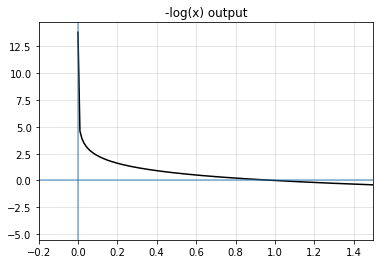

In [27]:
x = np.linspace(0.000001, 100, 10000);
y = [-np.log(i) for i in x];

fig, ax = plt.subplots(ncols=1)

ax.plot(x, y, color='black');
formatter(ax, title='-log(x) output')
ax.set_xlim((-0.2, 1.5));

What happens if the absolute value of the distance between the prediction and label is really small? That means that the model has performed well on predicting this value, so such an accurate prediction should be rewarded with a small loss. However, at very small values, the loss increases to infinity. Ths is the opposite of what we want.

The same thing goes for when the difference measured is greater than 1. The loss would decrease to zero as the input to the loss function approaches 1, and then actually turns negative. A negative loss doesn't really work in general.

So we can see here that if we want to train a model to predict a linear regression line of best fit (or hyperline of best fit), then we need to select an appropriate loss function that poses the task suitably.

### Normalized probability distributions

If we can find a way to constrain the input to the negative log to be between 0 and 1, we can find a use for it. 

Say we want to perform a classification task: we want to compute the probability of an input belonging to a class. We have as many outputs now as we have classes, and our label is a vector that indicates which of the outputs is correct. If we take all of these outputs to represent unnormalized probabiliities, i.e. logits, we can normalize them together into a probaility distribution. We can use the label to select the output that was supposed to have had the highest value and pass that to the negative log likelihood function.

Normalization is typically performed using the softmax function.

In [28]:
def neg_log(x):
    return -np.log(x)

In [29]:
# a low probability at the correct class label results in a higher loss
neg_log(0.02)

3.912023005428146

In [30]:
# a high probability at the correct class results in lower loss
neg_log(0.99)

0.01005033585350145

## Try for yourself: How to approximate the Support Vector Machine

Lets say we want to approximate a support vector machine. As a project, see if you can implement a neural network that has the necessary activation functions, outputs, and loss function to approximate this function. How would you implement a linear SVM? How would you implement a kernalized SVM?